Scenario: Clients want to simulate "what-if" decarbonization scenarios.

Tasks: Implement Monte Carlo Simulation. The Python script simulates a single scenario. Enhance it to run a Monte Carlo simulation (e.g., 1000 runs) where cost_reduction and emission_cut have a defined distribution (e.g., normal distribution using numpy.random.normal) instead of being fixed. Collect and plot a histogram of the final net_benefit. Code Sample (Python - Needs Monte Carlo!):

In [1]:
import numpy as np; import matplotlib.pyplot as plt

def simulate_scenario(investment):
    # PROBLEM: Deterministic, no uncertainty.
    cost_reduction_factor = 0.1
    emission_cut_factor = 0.05
    emission_value = 50 # Value per ton cut

    cost_reduction = investment * cost_reduction_factor
    emission_cut = investment * emission_cut_factor
    net_benefit = (emission_cut * emission_value) - (investment - cost_reduction)
    return net_benefit

# investment = 100000
# print(f"Single Run Benefit: {simulate_scenario(investment)}")
# TASK: Run this 1000 times, varying factors with np.random.normal. Plot a histogram.
# Our Take: Decisions need uncertainty analysis. Add Monte Carlo to this simulation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_scenario(investment, n_runs=1000):
    """
    Run Monte Carlo simulation for decarbonization scenario.
    
    Parameters:
    investment (float): Investment amount (e.g., $100,000).
    n_runs (int): Number of Monte Carlo runs (default: 1000).
    
    Returns:
    np.ndarray: Array of net_benefit values.
    """
    # Define distributions
    cost_reduction_mean, cost_reduction_std = 0.1, 0.02  # 10% ± 2%
    emission_cut_mean, emission_cut_std = 0.05, 0.01     # 5% ± 1%
    emission_value = 50  # $50 per ton CO2e cut
    
    # Generate random factors
    cost_reduction_factors = np.clip(
        np.random.normal(cost_reduction_mean, cost_reduction_std, n_runs), 0, None
    )
    emission_cut_factors = np.clip(
        np.random.normal(emission_cut_mean, emission_cut_std, n_runs), 0, None
    )
    
    # Compute net benefits
    cost_reductions = investment * cost_reduction_factors
    emission_cuts = investment * emission_cut_factors
    net_benefits = (emission_cuts * emission_value) - (investment - cost_reductions)
    
    return net_benefits

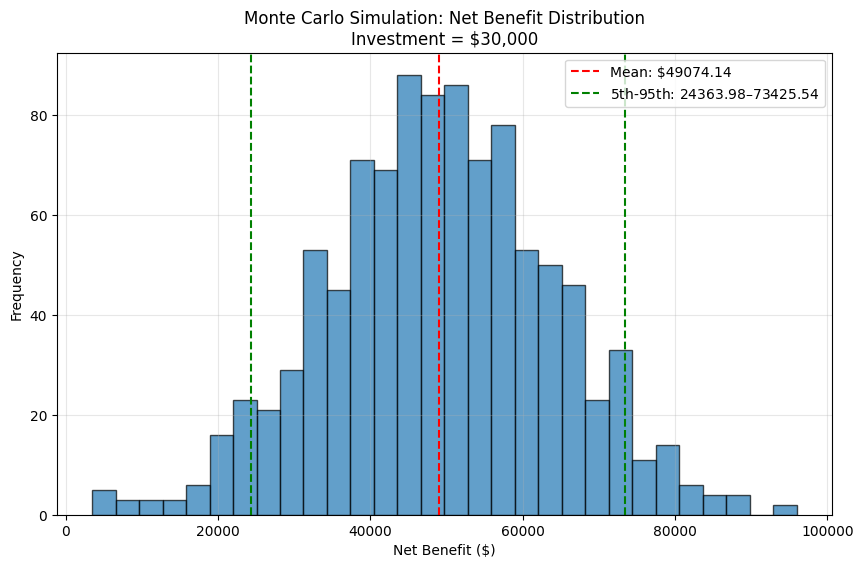

Mean Net Benefit: $49074.14
90% Confidence Interval: $24363.98–$73425.54


In [ ]:

investment = 30000
np.random.seed(42)  # For reproducibility
net_benefits = simulate_scenario(investment, n_runs=1000)

# Compute statistics
mean_benefit = np.mean(net_benefits)
p5, p95 = np.percentile(net_benefits, [5, 95])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(net_benefits, bins=30, edgecolor='black', alpha=0.7)
plt.title('Monte Carlo Simulation: Net Benefit Distribution\n Investment = $30,000')
plt.xlabel('Net Benefit ($)')
plt.ylabel('Frequency')
plt.axvline(mean_benefit, color='r', linestyle='--', label=f'Mean: ${mean_benefit:.2f}')
plt.axvline(p5, color='g', linestyle='--', label=f'5th-95th: ${p5:.2f}–${p95:.2f}')
plt.axvline(p95, color='g', linestyle='--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print summary
print(f"Mean Net Benefit: ${mean_benefit:.2f}")
print(f"90% Confidence Interval: ${p5:.2f}–${p95:.2f}")

This script enhances the deterministic decarbonization scenario into a Monte Carlo simulation with 1000 runs, introducing uncertainty in cost_reduction_factor (N(0.1, 0.02)) and emission_cut_factor (N(0.05, 0.01)) using numpy.random.normal.
I calculated net_benefit for a $30,000 investment, ensuring non-negative factors via np.clip. Results are visualized as a histogram with matplotlib, showing mean and 90% confidence intervals. I integrated "what-if" decarbonization decisions, aligning with our previous emissions uncertainty analysis.